# Results for the report

In [1]:
import errors
import wolff
import metropolis
import evolution
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize.minpack import curve_fit
import sys
sys.setrecursionlimit(10000000)

### Example of how to run a simulation

In [23]:
# Define simulation parameters
size = 100
T_i = 1
T_f = 1.5
step = 0.1

# Run Wolff algorithm
frames_w, obs_w, T_w = evolution.evolution(f=wolff.wolff_evolution,
                                                      relax=40,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)

# Run Metropolis algorithm
frames_m, obs_m, T_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)
/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:35: RuntimeWarning: invalid value encountered in sqrt
  sigma_A_n = np.sqrt((N-time)*np.sum(A_nn**2)-(np.sum(A_nn)**2))


(1.0, 3.5)

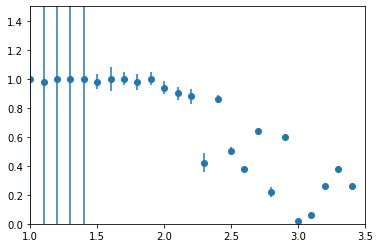

In [27]:
plt.errorbar(T_m,np.abs(obs_m[0]),yerr=obs_err_m[0],fmt='o')
plt.ylim(0,1.5)
plt.xlim(1,3.5)

(1.0, 3.5)

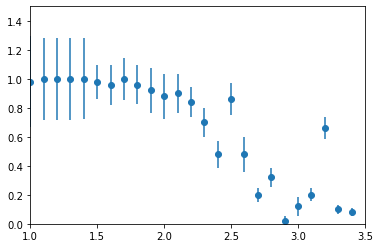

In [26]:
plt.errorbar(T_w,np.abs(obs_w[0]),yerr=obs_err_w[0],fmt='o')
plt.ylim(0,1.5)
plt.xlim(1,3.5)

In [4]:
stat_errors = [errors.get_error_observable(obser) for obser in obs]

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


## Metropolis algorithm
# Magnetization
We will study the following parameters:
* Lattice size
* Number of relaxation steps
* Phase diagram w.r.t. $k_BT$ and $h$

In [15]:
# Define variables to evaluate and store
lengths = np.arange(10, 100, step=50)
magnets = [[], []]
suscepts = [[], []]
cvs = [[], []]

# Run simulation for different system sizes
for length in lengths:
    print(length)
    _, obs, obs_err, T = evolution.evolution(f=metropolis.metropolis_evolution,
                                             relax=2000,
                                             L=int(length),
                                             T_init=1,
                                             T_max=2,
                                             dT=0.1)
    # Save data
    magnets[0].append(obs[0])
    magnets[1].append(obs_err[0])
    cvs[0].append(obs[1])
    cvs[1].append(obs_err[1])
    suscepts[0].append(obs[2])
    suscepts[1].append(obs_err[2])

10
60


In [ ]:
# get errors from the whole data
# errors_magnets = [errors.get_error_observable(m)[0] for m in magnets]
# errors_suscepts = [errors.get_error_observable(chi)[0] for chi in suscepts]
# errors_cvs = [errors.get_error_observable(cv)[0] for cv in cvs]
# taus_magnets = [errors.get_error_observable(m)[1] for m in magnets]

In [21]:
np.array(magnets[1])/10

array([[0.00000000e+00, 8.44162615e-02, 7.80328827e-01, 1.92013169e+00,
        1.72440947e+00, 3.79187451e+00, 1.63741285e+00, 7.04404620e+00,
        4.96712386e+00, 6.51599274e-03, 8.49925893e+00, 6.13542526e-03,
        7.03368540e-03, 7.84264423e-03, 8.13965297e-03, 7.52442516e-03,
        7.20434435e-03, 6.31327166e-03, 2.02142423e-03, 2.35207691e-03,
        9.23073257e-04, 2.82639668e-03, 2.62860008e-04, 3.71306893e-04,
        3.38043046e-03, 2.20361937e-03, 1.70617083e-03, 5.99503243e-04,
        7.55294403e-04, 1.77985039e-04, 5.13824624e-04, 3.57867745e-04,
        3.12866844e-04, 6.92991215e-04, 7.34949987e-04, 3.69757704e-04],
       [0.00000000e+00, 6.72801584e-03, 1.78262747e-02, 8.81628248e-03,
        6.18612464e-02, 1.80409001e-01, 1.78959773e-02, 1.93700785e-01,
        2.29536309e-01, 1.62269085e-01, 2.50310100e-01, 7.29942856e-01,
        7.25112679e-01, 1.05509461e-01, 1.57723014e+00, 1.58647478e+00,
        8.43858089e-01, 7.79420584e-01, 2.50615247e+00, 3.57812

(0.0, 1.5)

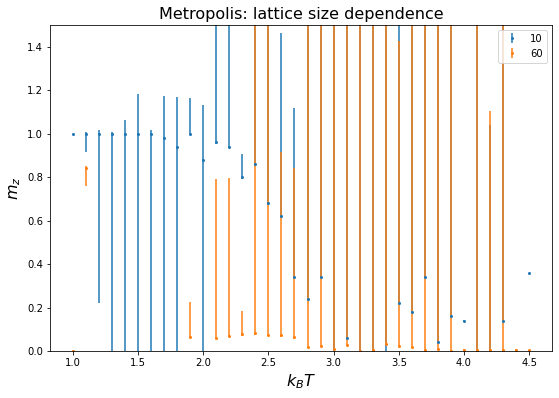

In [22]:
plt.figure(figsize=(9,6))
for mag in magnets:
    plt.errorbar(T,mag[0],yerr=np.array(magnets[1])/10,fmt='o',markersize=2)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Metropolis: lattice size dependence',fontsize=16)
plt.ylim(0,1.5)

Text(0.5, 1.0, 'Metropolis: lattice size dependence')

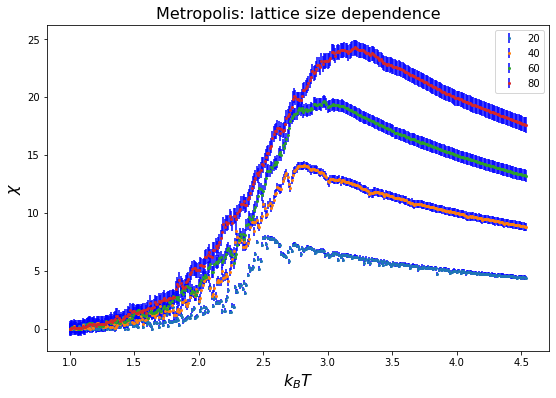

In [51]:
plt.figure(figsize=(9,6))
for susc in suscepts[1::2]:
    plt.errorbar(T,susc,yerr=errors.get_error_observable(susc)[0],ecolor='b',fmt='o',markersize=2)
plt.legend(lengths[1::2])
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$\chi$',fontsize=16)
plt.title('Metropolis: lattice size dependence',fontsize=16)

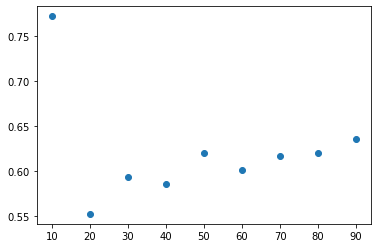

In [48]:
plt.scatter(lengths, taus_magnets)

In [47]:
relax = np.arange(1000,10000,step=2000)
magnets = []
for l_relax in relax:
    _, obsers_relax, T_relax = evolution.evolution(f=metropolis.metropolis_evolution,
                                                   relax=l_relax,
                                                   L=80,
                                                   T_init=0.1,
                                                   T_max=2,
                                                   dT=0.01)
    magnets.append(obsers_relax[0])

(1.5, 4.5)

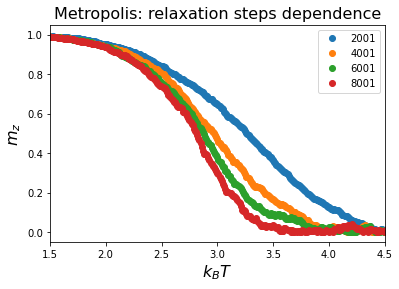

In [54]:
plt.plot(T,np.transpose(magnets[1:]),'o')
plt.legend(relax[1:])
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Metropolis: relaxation steps dependence',fontsize=16)
plt.xlim(1.5,4.5)

In [ ]:
plt.scatter(relax,taus_magnets)

In [2]:
fields = np.arange(-1,1,step=0.25)
phase_diagram = []
for h in fields:
    print(h)
    _, obsers_relax, T_relax = evolution.evolution(f=metropolis.metropolis_evolution,relax=2000,L=50,T_init=0.1,T_max=2,dT=0.01,h=h)
    phase_diagram.append(obsers_relax[0])

NameError: name 'np' is not defined

In [6]:
x,y = np.meshgrid(T_relax,fields)

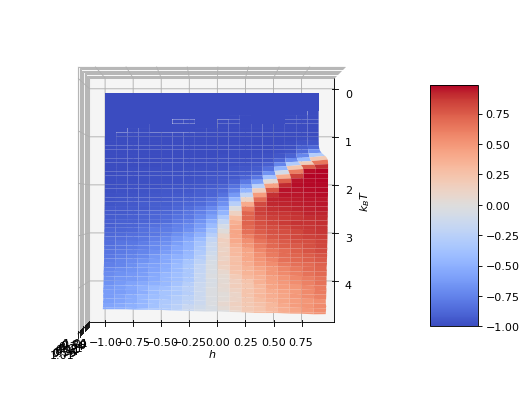

In [7]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=80)

# Plot the surface.
surf = ax.plot_surface(x,y,np.array(phase_diagram), cmap=cm.coolwarm)
plt.xlabel(r'$k_B T$')
plt.ylabel(r'$h$')
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(azim=0, elev=90)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

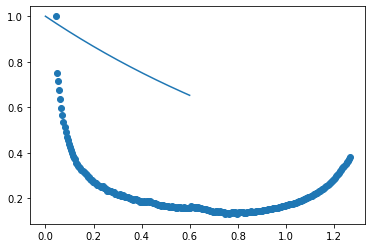

In [8]:
x = np.arange(0.6,step=0.001)
y = func(x, 1.40353129)
plt.scatter(mag[0][:len(af_mag)],af_mag)
plt.plot(x,y)

In [9]:
n = 10
x = np.arange(2,step=0.01)
arrays = []
taus = np.arange(0,1,step=0.1)
for tau in taus:
    arrays.append(func(x,tau))
arrays = np.array(arrays)

<ipython-input-7-573095ae2af6>:21: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-x/b)
<ipython-input-7-573095ae2af6>:21: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-x/b)


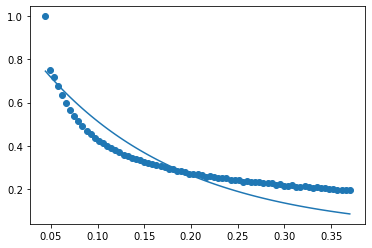

In [10]:
#plt.plot(x,np.transpose(arrays))
Y = af_mag[:25]
X = mag[0][:25]
plt.scatter(X,Y)
plt.plot(X,func(X,0.15))

In [11]:
curve_fit(func,X,Y)

NameError: name 'curve_fit' is not defined

In [ ]:
mag[1]

In [127]:
n = 200
curve_fit(func,mag[0],mag[1])

(array([1.40353129]), array([[0.00237787]]))

In [7]:
def func(x,b):
    """
    Function used to fit the decaying exponential of the autocorrelation func

    Parameters:
    -----------
    x: float

    a: float
        magnitude
    b: float
        characteristic distance
    c: float
        shift from zero

    Return:
    --------
    _: float
        function of exponential decay evaluated at x,a,b,c.
    """
    return np.exp(-x/b)